In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import choices
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import random
import matplotlib.pyplot as plt

Mounted at /content/drive


In [3]:
#Open the data of bandit reward
datareward = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PSLWeek_TD/Eval_bandit/group_4_reward.csv')
#Open the data of bandit responses
datareponses = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PSLWeek_TD/Eval_bandit/group_4_responses.csv')
print(datareward)
print(datareponses)

    -2.730146019748327935e-01  -6.412073311311793367e-01  \
0                    0.721906                   0.323079   
1                    0.170272                   0.304888   
2                   -0.316548                   0.405251   
3                   -0.203019                  -0.682443   
4                   -0.403140                   0.270575   
..                        ...                        ...   
94                   0.029477                   0.385012   
95                   0.221456                   0.248762   
96                  -0.109356                   0.108927   
97                   0.172962                  -0.102964   
98                   0.120086                   0.359200   

    -5.586626363180334787e-01  9.194125247518157851e-01  \
0                   -0.030417                 -0.191465   
1                   -0.513665                  0.173179   
2                   -0.161932                 -0.207003   
3                   -0.123295              

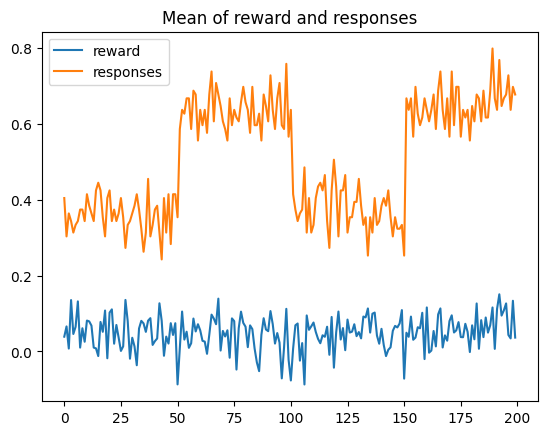

In [29]:
means = datareward.mean()
plt.plot(range(len(means)), means, label='reward')
mean2 =datareponses.mean()
means = datareward.mean()
plt.plot(range(len(mean2)), mean2, label='responses')
plt.legend()
plt.title('Mean of reward and responses')
plt.show()

In [22]:
import random

# Définir les probabilités de gain des deux leviers (ex: 70% et 40%)
probabilities = [1, 0]
dat = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PSLWeek_TD/Eval_bandit/group_4_reward.csv')


In [23]:
def simulate(rounds):

  # Nombre de tours du jeu
  num_rounds = rounds

  # Initialisation des variables
  lever = random.choice([0, 1])  # Commence avec un levier aléatoire (0 ou 1)
  wins = []  # Liste pour stocker les gains au fil du temps
  lever_choices = []  # Stocke les choix du joueur
  rewards = []
  polarity = 1

  # Simulation du jeu
  for x in range(num_rounds):
    LeverA = np.random.normal(0.2, 0.4)*polarity
    LeverB = np.random.normal(-0.2, 0.4)*polarity
    if x%50 == 0 :
      polarity *= -1

      # Assigner la récompense selon le levier choisi
    if lever == 0:
      reward = LeverA
    else:
      reward = LeverB

      # Vérifier si c'est un gain (reward > 0)
    win = 1 if reward > 0 else 0

      # Stocker les résultats
    wins.append(win)
    rewards.append(reward)
    lever_choices.append(lever)

      # Appliquer la stratégie "Win-Stay, Lose-Change"
    if win == 0:  # Si on perd, on change de levier
      lever = 1 - lever  # Change entre 0 et 1

  return wins, lever_choices, rewards

In [24]:
a,b,c = simulate(200)

In [25]:
sims = []
for x in range(100):
  a,b,c = simulate(200)
  sims.append(b)

In [26]:
sim1=pd.DataFrame(sims)

Text(0.5, 1.0, 'V1 response averages')

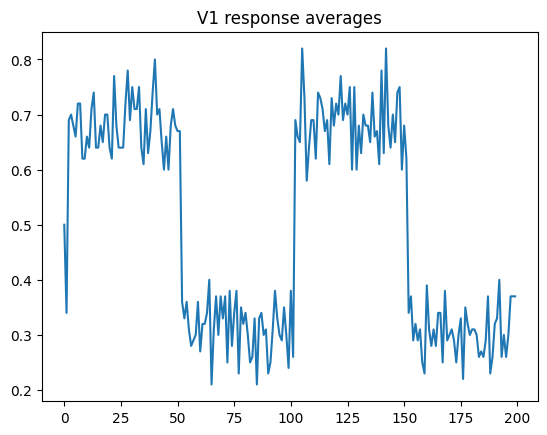

In [27]:
sim1.mean(axis=0).plot()
plt.title("V1 response averages")

In [30]:
# Assuming sim1 is a 2D structure (e.g., list of lists, DataFrame)
sim1_mean = pd.DataFrame(sim1).mean(axis=0).values.ravel()
actual_rewards = mean2.mean(axis=0).values.ravel()

sns.kdeplot(data=sim1_mean, bw_adjust=0.5, label="V1 response average")
sns.kdeplot(data=actual_rewards, bw_adjust=0.5, label="Actual Rewards")

plt.legend()
plt.xlabel("Reward Value")
plt.ylabel("Density")
plt.title("Kernel Density Estimation of Reward Distributions")
plt.show()

AttributeError: 'numpy.float64' object has no attribute 'values'

In [ ]:
sim_df = pd.DataFrame(sims, columns = ["wins", "lever_choices", "rewards"])

In [ ]:
sim_df

,wins,lever_choices,rewards
0,"[0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, ...","[0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, ...","[-0.21695529256028695, -0.22657117932587334, 0..."
1,"[1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, ...","[1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0.4206718642338964, -0.1438386859215362, -0.0..."
2,"[0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, ...","[-0.20989654193960972, -0.9069219305011094, 0...."
3,"[0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, ...","[1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...","[-0.32383702246914725, -0.46524270911475935, -..."
4,"[1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, ...","[0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, ...","[0.48924324469890257, 0.719917103820642, 0.309..."
5,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...","[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, ...","[0.38949035499174084, 0.26007504775515905, 0.1..."
6,"[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, ...","[1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, ...","[-0.46222397885633615, 0.1947055802733215, 0.1..."
7,"[0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, ...","[1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[-0.10938806085148706, 0.2948491267776448, 0.5..."
8,"[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, ...","[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, ...","[-0.340335018174819, -0.26852911115099304, -0...."
9,"[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, ...","[-0.19433377918570746, 0.4095373330277998, 0.1..."


In [ ]:
all_lc = [val for sublist in sim_df["lever_choices"] for val in sublist]

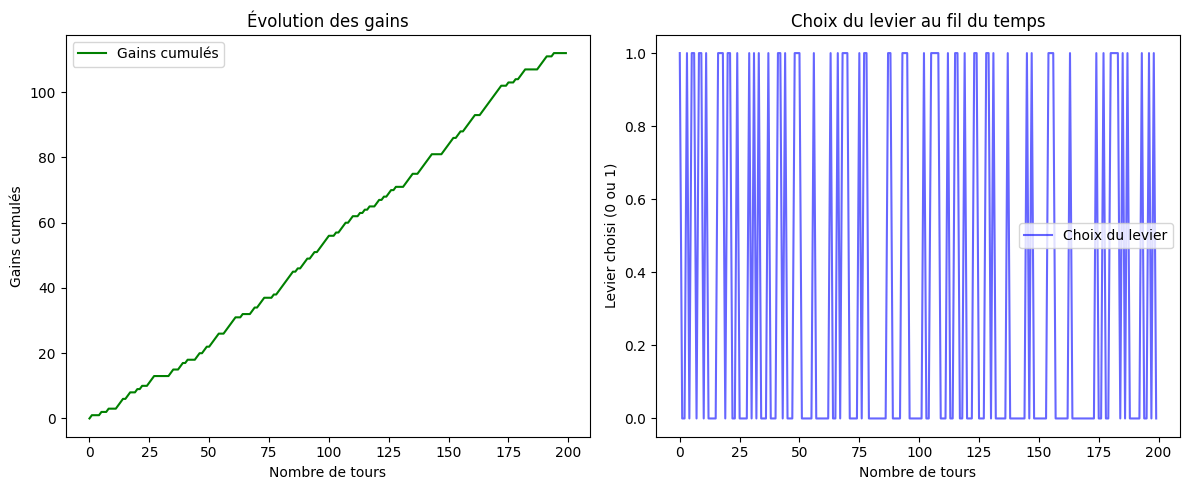

Total de gains : 112 / 200 (56.00%)


In [ ]:
# Affichage des résultats
plt.figure(figsize=(12, 5))

# Graphique des gains cumulés
plt.subplot(1, 2, 1)
plt.plot(np.cumsum(wins), label="Gains cumulés", color="green")
plt.xlabel("Nombre de tours")
plt.ylabel("Gains cumulés")
plt.title("Évolution des gains")
plt.legend()

# Graphique des choix de levier au fil du temps
plt.subplot(1, 2, 2)
plt.plot(lever_choices, label="Choix du levier", color="blue", alpha=0.6)
plt.xlabel("Nombre de tours")
plt.ylabel("Levier choisi (0 ou 1)")
plt.title("Choix du levier au fil du temps")
plt.legend()

plt.tight_layout()
plt.show()

# Affichage des statistiques
total_wins = sum(wins)
print(f"Total de gains : {total_wins} / {num_rounds} ({(total_wins / num_rounds) * 100:.2f}%)")